# Jupyter Notebook
Wie bereits erkennbar besteht ein Jupyternotebook aus Zellen. In der Regel kann eine Zelle entweder einen beschreibenenden Text beihnalten welcher mittels Markdown Syntax editiert wird oder Code in einer dezidierten Programmiersprache, wie Python, beinhaltet.

Jupyter Notebooks sind grundsätzlich Web-Applikationen welche als Dokument geteilt und versendet werden können. In der Regel beinhaltet ein Notebook Code-Zeilen, Gleichungen, Visualisierungen und Texte. Besonder eignen sich Jupyter Notebooks dazu Datenanalysenschritte aufzuzeigen, diese zu beschreiben und entpsrechende Visualisierungen einzubetten. Dadurch haben sich Jupyter Notebooks besonder im Data Science Bereich als unerlässliches Werkzeug etableirt.

---

Dies ist eine Markdown Zelle und erlaubt das formattiern von Text in der entsprechenden Syntax

'Hello Jupyter!'

**'Hello Jupyter!'**

_'Hello Jupyter!'_

In [1]:
# Eine Python Code Zelle kann wie gewohnt kommentiert werden
print('Hello Jupyter!')

Hello Jupyter!


# 1. Python Pakete laden
---
Wie in einem Python Script werden entsprechende Module geladen. Wichtig hier ist das man entsprechende Zellen nicht unbedingt in Reihenfolge ausführen muss.

Pandas
* Ist eine Software for Daten Manipulation und Analyse
* Wird oft als "pd" geladen um entpsrechend Code-Text zu kürzen.

Plotly-express
* Ist ein Software Paket welche es erlaubt komplexe Visualisierungen zu erstellen

In [2]:
import pandas as pd
import plotly.express as px

# 2. Datensatz laden
---
Der Datensatz ist als .csv Datei gespeichert. Pandas erlaubt es diese Datei direkt in ein Dataframe zu lesen. Dieses Dataframe kann dann einfach manipuliert, inspiziert und analysiert werden. 

Der Variablen Namen des Dataframes wird oft als df abgekürzt.

In [3]:
try:
    df = pd.read_csv('heart.csv')
except:
    df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

Der nun im dataframe "df" gespeicherte Datensatz ist ein Trainings und Benchmark Datensatz welcher auf Kaggle.com veröffentlicht wurde. Kaggle ist eine Organisation von Data Science Wettbewerben. Dabei werden mehrere Tausend Datenstätze bereitgestellt mit welche Datengestützte Modelle für Prediktive Analysen trainiert werden können. Dabei können entsprechende Modelle unter der Community verglichen werden was den Wettbewerbsaspekt der Platform bildet.

https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

<img src='kaggle.jpg' width="800" height="300">

<img src='https://python.casa/assets/img/topic8_kaggle.jpg' width="800" height="300">

<img src='https://python.casa/assets/img/logo.abdfbdf5.png' width="800" height="300">

# 3. Datensatz inspizieren
---
Nach dem der Datensatz geladen ist wird dieser auf dessen Inhalt und Vollständigkeit überprüft. Dabei spielen die folgenden Aspekte die wichtigsten Punkte wenn es um das Überprüfen der Daten geht:
* Lücken einer Serie (Bsp. fehlende Daten in einer Kolonne in einem Dataframe)
* Typ der Daten (Bsp. Integer, Float, Strin, etc.)
* Duplikate (Bsp. Kolonne doppelt erfasst)
* Integrität (Bsp."na" anstatt 0)

### 3.1 Überblick 

Um einen Überblick zu erhalten werden die obersten Datenreihen im Dataframe inspiziert. Hierzu wird der Befehl "head()" an das Dataframe angefügt. Die Zahl in der Klammer im "head()" Befehlt beschreibt die anzahl der obersten angezeigten Reihen (Hier noch eine Erinnerung das Python anfängt bei 0 zu zählen).

In [4]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Was mann bereits erkennt ist das das Dataframe aus 14 Kolonnen und einer Vielzahl an Zeilen besteht. Die erste Kolonne welche keinen Namen hat (also diese vor "age") is der Index des Dataframes, also eine Nummerierung jeder Zeile. Ebenfalls sieht mann hier das jede Zeile einen Patienten beschreibt und jeder Kolonnen-Parameter einen Physiologischen Wert des Patienten.

Parameter:
* **Alter** -> age : Age of the patient
* **Geschlecht** -> sex : Sex of the patient
* **Angina** -> exang: exercise induced angina (1 = yes; 0 = no)
* **Anzahl Hauptvessel** ->    ca: number of major vessels (0-3)
* **Brustschmerzen** -> cp : (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
* **Ruheblutdruck** -> trtbps : resting blood pressure (in mm Hg)
* **Cholesterol** -> chol : cholestoral in mg/dl fetched via BMI sensor
* **Nüchternblutzucker** -> fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **Elektrokardiographische Ergebnisse im Ruhezustand** -> rest_ecg : resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, 2: left ventricular hypertrophy)
* **erreichte maximale Herzfrequenz** -> thalach : maximum heart rate achieved
* **Ausgabe** -> Output : (0 = less chance of heart attack 1= more chance of heart attack)


Hier noch einige wichtige Punkte zu den Parametern:
* Was mann in dieser Beschreibung ebenfalls sieht ist das einige der Parameter **codiert** sind, heisst anstatt einen Wert, wie beim Alter, ist nur eine Zahl angegeben, wie beispielsweise beim Parameter "Angina" wo einen 1 Ja und eine 0 Nein bedeutet. Grundsätzlich möchte man Kategorische Variablen (Ja/Nein, Gut/Schlecht, etc.) als Zahlenwerte abbilden weshalb diese codiert werden!
* Der Parameter **Ausgabe** ist ein besonders wichtiger Teil dieses Datensets, denn dieser beschreibt die Wahrscheinlichkeit auf eine Herzattacke des Patienten. Dieses Datenset hat also eine Reihen an Physiologischen Paramters und die zugehörige Wahrscheinlichkeit auf eine Herzattacke. Mit statistischen Methoden kann man ein Model entwickeln welche es erlaubt genau diesen **Ausgabe** Parameter aufgrund der anderen Werte vorasuzusagen!

### 3.2 Werte anzeigen
Bezüglich der Inspektion des Dataframes kann man sich auch bestimmte Zeilen anschauen. Hierzu wir der gesuchte Index mittels des ".loc[Zeile, Kolonne]" Befehls and das Dataframe angefügt. Hierzu noch einige Beispiele:
* "df.iloc[1,2]" zeigt den Wert der zweiten Zeile und dritten Kolonne (Python zählt bei 0!)
* "df.ilog[0:4,2]" zeigt Werte von 5 Zeilen und der dritten Kolonne
* "df.iloc[1,:]" zeigt alle Werte der zweiten Zeile and (":")

In [5]:
df.iloc[99,0:3]

age    53.0
sex     1.0
cp      2.0
Name: 99, dtype: float64

"df.iloc[99,0:3]" zeigt also Werte der Parameter "age", "sex" und "cp" des Patienten mit dem Index 99

---
---

## Aufgabe 1
Beschreiben Sie welche Werte in der nächste Zelle angzeigt werden (Beschreibung inder darunterliegenden Markdown Zelle)

In [6]:
df.iloc[97:99,0]

97    52
98    43
Name: age, dtype: int64

<Beschreibung>

Beschreibung:

In [7]:
df.loc[2,:]

age          41.0
sex           0.0
cp            1.0
trtbps      130.0
chol        204.0
fbs           0.0
restecg       0.0
thalachh    172.0
exng          0.0
oldpeak       1.4
slp           2.0
caa           0.0
thall         2.0
output        1.0
Name: 2, dtype: float64

Beschreibung:

---
---

### 3.3 Dataframe Info

Nun gibt es weitere Befehle welche den Inhalt eines Dataframes beschreiben. So gibt der ".info()" Befehlt einen überblick über das Dataframe. Besonders wichtig hier ist der Dtype welcher beschreibt im welchem Datentyp die jeweiligen Kolonnen erfasst sind.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 3.4 Leere Zellen

Ebenfalls wichtig ist es zu schauen ob eventuell leere Zellen im Dataframe vorhanden sind. Also Zellen in welche keine Werte geschrieben sind (Die Zahl null wäre ein Wert). Um dies schnell zu überprüfen wird der Befehl ".isnull()" angewendet, dieser Zeigt dan im ganzen Dataframe eine leere Zelle vorhanden ist (False = Wert ist vorhanden, True = hier fehlt ein Wert und Zelle ist leer).

In [9]:
df.isnull()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Natürlich möchte mann nun icht das ganze Dataframe nach "True" durchschen und somit wendet man einen weiteren Befehl an. Mit dem ".sum()" Befehl können die Anzahl an "True" gezählt werden und dieser kann einfach an den vorherigen Befehl angehängt werden

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Somit hat es keine leeren Zellen im Dataframe

### 3.5 Schnelle statistische Auswertung

Der Befehl ".describe()" generiert eine einfache statistische Auwertung über jede Kolonne. Dies erlaubt es eine Überblick über die Integrität der Daten zu erhalten.

In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Hier sieht man Beispielsweise das das Durchschnittsalter (mean in der Kolonne "age") 54 Jahre ist oder das der jüngste Patien 29 Jahre und er älteste 77 Jahre alt ist.

### 3.6 Dublikate
Nun möchte man noch überprüfen obe enventuell ein Patient doppel, also als Dublikat erfasst wurde. Ähnlich zum ".isnull()" Befehlt wird hierzu der ".dublicate()" und ".sum()" Befehl in Kombination angewendet

In [12]:
df.duplicated().sum()

1

Somit hat es dein Dublikat im Datensatz vorhanden.

Nun möchte man dieses natürlich löschen um die entsprechende Zeile zu finden wird der ".dublicated()" Befehl als index verwendet.

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In einer Zeile ist also der Wert "True" vorhanden, um die bestimmte Zeile zu finden wird dieser Index mit dem Befehl ".loc[Index]" kombiniert.

In [14]:
df.loc[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Somit ist die Zeile mit dem Index 164 ein Dublikat. Wobei die Zeile mit dem Index 163 sehr wahrscheinlich der erste Original eintrag ist

In [15]:
df.iloc[163:165,:]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Nun könnnen wir also die Zeile mit dem Index 164 aus dem Dataframe entfernen. Hierzu wird einfach der Befehl ".drob_dublicates()" angewendet.

In [16]:
df= df.drop_duplicates()

Damit im index keine Lücke entsteht (162,163,[ ], 165,166) wird der Index zurückgesetzt

In [17]:
df= df.reset_index(drop=True)

Jetzt sollte alles passen und kein Dublikat vorhanden sein

In [18]:
df.loc[163:164]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


# 4 Daten Visualisieren
---
Matplotlib, Seaborn, Plotly Express oder ggplot, um nur einizge zu nennen, sind Visalisierungs-Pakete für Python. Jedes dieser Werkzeuge hat Vor-und Nachteile im Bezug die Syntax, Zielplot und Dateninput. Einige sind ausgelegt auf grosse Datenmene andere auf einfaches Userinterface oder wurden von anderen Programmiersprachen zu Python portiert. Somit ist es of der Fall das man je nach Zielplot zwischen diese Paketen wechselt oder man sich auf eines fixiert aufgrund des Interfaces oder anderen Gründen. 

<img src='Plots_Python.jpg' width="700" height="400">

### 4.1 Pandas plot
Pandas selber beinhaltet einige Visualisierungfunktionen welche als Methoden integriert sind.

Mit dem ".plot()" Befehlt wird eine Visualisierung des ganzen Dataframes erstellt.

<AxesSubplot:>

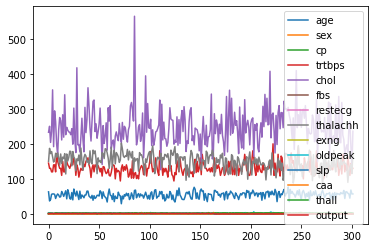

In [19]:
df.plot()

<AxesSubplot:xlabel='age', ylabel='chol'>

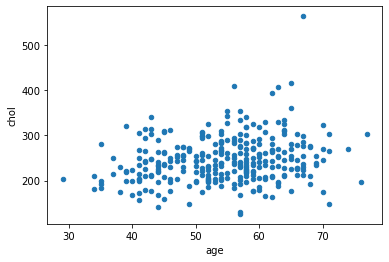

In [20]:
df.plot.scatter(x="age", y="chol")

Die Punkte zeigen somit die Überlappund des Alter eines Patienten und dem zugehörigen Cholesterol Wert.

Möchte man nur einen betimmten Parameter plotten wird der Kolonnenname indexiert "df["Kolonnenamen"]".

<AxesSubplot:>

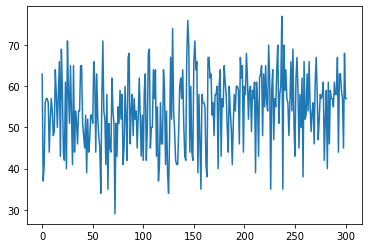

In [21]:
df["age"].plot()

Die obige Grafik ist nun sehr minimal und es fehlen beschreibende Informationen. Weitere Paremeter können nun in den Klammern des ".plot()" Befehls erfasst werden.

Generell sind alle Parameter unter folgendem Link ersichtlich: **https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html**

Hier sind einige Beispiele dazu:
* Title der Grafik -> title="title"
* Grafik Grösse -> figsize=(x,y)
* x- und y-Achsentitel -> xlabel="xlabel", ylabel="xlabel"
* Rotation der X-Achsen Indexierung -> rot=10
* Legende -> legende=True

<AxesSubplot:title={'center':'Alter der erfassten Patieneten'}, xlabel='Patienten Index', ylabel='Alter'>

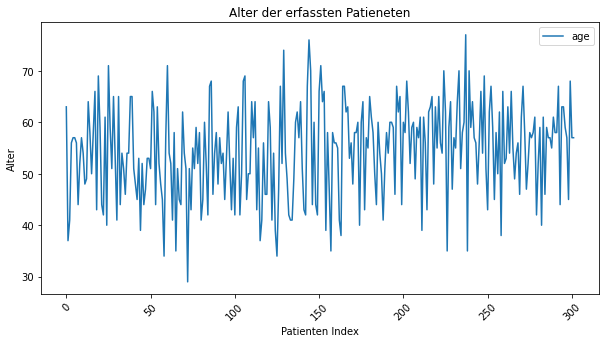

In [22]:
df["age"].plot(figsize=(10, 5),title="Alter der erfassten Patieneten",xlabel="Patienten Index", ylabel="Alter", rot=45, legend=True)

Jetzt ist die Grafik sinnvoll formatiert, jedoch mach es eigentlich gar keinen Sinn das Alter der Patienten auf diese Art zu Visualisieren, da man gar keine Informationen aus dieser Grafik extrahieren kann.


### 4.2 Visualisierung auswählen
Je nach Datentyp, Quelle, Zusammensetzung und Ziel sollte eine bestimmte Visualisierung ausgewählt werden. Generell orientirt man sich daran ob man an einer Verteilung, einem Vergleich, ans Zusammenhänge oder an einer Zusammensetzung interessiert ist und eine entsprechende representierbare Grafik erstellen möchte.

<img src='choose_graph.jpg' width="700" height="600">

Im Bezug auf den Parameter "age" wäre man zum Beispiel an der Verteilung interessiert, also wieviele Patienten eines bestimmten Alter es gibt. Hierzu eignet ein Histogram Plot. Diese Art von Plot kann ebenfalls mit Pandas generiert werde mittel des ".hist()" Befehls.

<AxesSubplot:>

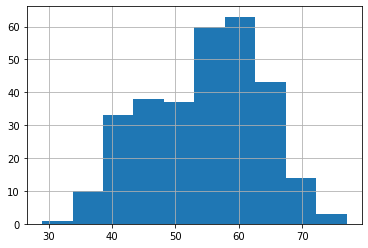

In [23]:
df["age"].hist()

Auf der y-Achse ist die Anzahl Patienten in einer bestimmten Alterskategorie aufgeführt. Auf der x-Achse sind also gleichmässige Abschnitte welche eine Kategorie bilden. So sind zum Beispiel ca 2 Patienten in Alterskategorie von ca 20-34 Jahre alt. In der Kategorie 56-63 Jahre sindca run 62 Patienten. Jetzt kann man die Anzahl an Alterskategorien noch erhöhen in dem den Parameter "bins=50" einfügt.

<AxesSubplot:>

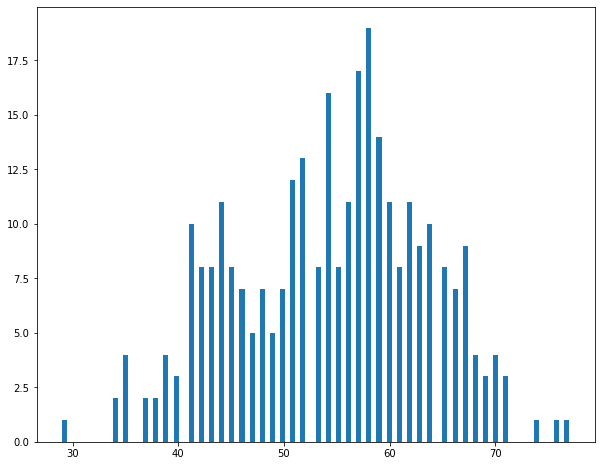

In [24]:
df["age"].hist(bins=100, figsize=(10, 8), grid=False)

Diese Grafik ist schon einiges Übersichtlicher und gibt eine klare Übersich über die Altersverteilung der Patienten.

---
---
## Aufgabe 2
Schreiben sie den Code um den folgenden plot zu generiern 

<img src='aufgabe.jpg' width="400" height="280">

In [25]:
# Hier den Code schreiben


---
---

### 4.3 Statistische Visualisierungen
Besonder wichtig sind Visualisierungen welche Statistische Auswertungen bildlich unterstützen. Wie bereits weiter oben beschrieben kann mit dem ".describe()" Befehl eine statistische auswertung über die Kolonnen erstellt werden.

In [26]:
df["age"].describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

Diese Statistischen Parameter kann auf einfache weise mit einem Boxplot representieren. Den entsprechenden Befehl das is ".boxplot()" wobei noch eine bestimme Kolonne als Parameter bestimmt werden muss.

<AxesSubplot:>

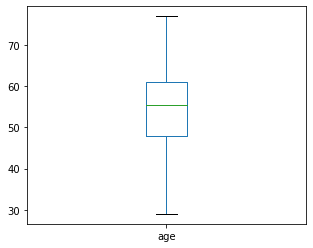

In [27]:
df.boxplot(column="age", figsize=(5, 4),grid=False)

Diese ist somit eine visuell representierung von statistischen Basisparametern. Boxplots können mit einem weiteren Dataframe parameter erweitert werden. So ist man zum Beispiel interssiert and den Altersunterschieden zwischen Mann und Frau.

<AxesSubplot:title={'center':'age'}, xlabel='sex'>

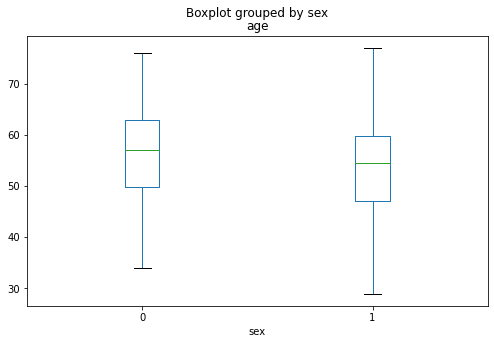

In [28]:
df.boxplot(column="age", by="sex", figsize=(8, 5),grid=False)

### 4.4 Abhängigkeiten zwischen Parametern erkennen
Sogennante Korrelationsplots sind oft einen statistische Visulasierung welche verwendet wird um Zusammenhänge zwischen verschiedenen Parametern zu finden. 

Eine einfache Methode hierzu ist es den Pearson Koeffizient zwischen zwei Parametern zu berechnen So wird zum Beispel der Parameter "age" und "chol" als das Alter und der Cholesterolspiegel gegenübergestellt. Dies zuerst mit einem Scatterplot visualisiert werden

<AxesSubplot:xlabel='age', ylabel='chol'>

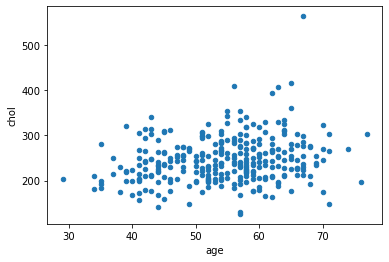

In [29]:
df.plot.scatter(x="age", y="chol")

Steigt nun der Cholesterolspiege mit steigendem Alter ergibt des einen positive Pearson Koeffizient, wobei eine absolute Abhängigkeit zwischen diesen Wert bei 1 liegen würde.

In der folgenden Übersicht ist aufgezeigt wie sich der Pearson Koeffizien verhält:

<img src='pearson.jpg' width="650" height="400">

Damit man nicht jedes Parameter Paar einzeln berechnen muss erstellt man eine Korrelationsmatrix wobei dann jeder Parameter gegenüber jedem Parameter verrechnet wird. Diese Korrelationsmatrix wird einfach mit dem Befehl ".corr()" erstellt.

In [30]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Nun kann man diese Matrix nach hohen (oder tiefen Werten) durchsuchen um Paramterpaare zu finden welche stark voneinen Abhängig sind. Dabei wäre man besonders an der "output" Zeile interessiert da diese Ja die Wahrscheinlichkeit auf einen Herzinfarkt aufzeigen würde um somit welcher andere Parameter den grössten Einfluss darauf hat.

Wichtig ist das beim Korrelationsplot die diagonalen Werte ignoriert werden können das diese ja den Pearson Koeffizient des Parameters mit sich selber, also dem Wert 1, aufzeigt.

Da der Mensch nicht gut is im scrennen von Zahlen können wir den Korrelationsplot mit eine Farbskala erweitern. Hierzu wir die Visualisierungsbibilothek plotly-express verwenden und der dazugehörige Befehtl ".imshow()"

In [31]:
px.imshow(df.corr())

# 5 Machine Learning ("AI") in a Nutshell
---
Machine Learning und AI ist ein aktuelles Thema und wird in verschiedenen technischen Bereichen eingesetzt, so auch im Gesundheitsbereich. Oft wird dabeim diffusen Begriffen wie "deeplearning", "ai", "general artifical intelligence" oder "machine learning" verwendet. Dabei wird oft menschen ähnliche Intelligenz suggeriert wo gar keine ist!

Dieses Kapitel soll auf einfache weise das erstellen einer "AI" aufzeigen. Dabei spielen heute besonders grossen Datenmengen eine Rolle da diese es erlauben Iterative statistische Methoden zu "trainieren" ohne das man manuell Parameter einstellen muss. Um dies zu erreichen geht man immer nach dem gleichen Prinzip vor welches in der folgenden Grafik aufgzeigt ist:

<img src='ml_procedure.jpg' width="650" height="300">


### Pyhton Paket laden
Hierzu verwenden wir die sklearn Bibliothek, eine Software für das erstellen von machine learning modellen mit Python

In [32]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

### 5.1 Get Data | Daten laden
Hierzu verwenden wir wieder das "heart.csv" Datenset und laden dies nochmals neu als Dataframe


In [33]:
try:
    df = pd.read_csv('heart.csv')
except:
    df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

### 5.2 Clean, Prepare & Manuplate Data | Bereinigung, Vorbereitung und Manipulation der Daten
Der wichtigste Schritt bildet die Aufarbeitung und Vorbereitung des Datensatzes um diesen für das Trainingen des Models bereit zu haben.

Hier nochmals eine kurze Übersicht über den Datensatz:
* Parameternazahl = 14 
* Anzahl Werte pro Kolonnen 303

Dies können wir nochmals auch mit dem ".shape" Paramer überprüfen:

In [34]:
df.shape

(303, 14)

Der erste Wert beschreibt hier die anzahl Zeilen (hier = 303) und die zweite Zahl die Anzahl Kolonnen (also 14 Parameter)

Als nächste wird das Dataframe aufgetrennt in eine Eingangs und Ausgangsdaten set. Dabei bilden alles Physiologischen Parameter den Eingangsdatensatz und die Kolonne "output" unseren Ausgangsdatensatz. Somit möchten wir auf grund unseres Eingangs Parameter den Ausgangsparameter voraussagen.
* Eingang -> Input Paramter (age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall)
* Ausgang -> Output Parameter (output)

In der Regel werden zwei neue Dataframes gebilded, das Eingangsdatenframe **X** und das Ausgangsdataframe **Y**:

In [35]:
X= df.iloc[:,:-1].values
Y= df.iloc[:,-1].values

Wir können nochmals die Zusammensetzung mit dem ".shape" Befehl überprüfen

In [36]:
print(X.shape)
print(Y.shape)

(303, 13)
(303,)


Nun werden noch bestimmte Parameter skaliert, heisst die Werte bestimmter Kolonnen werden angpasst damit diese nicht überproportianal das zu trainierende Modell beinflussen.

<img src='scaling.jpg' width="450" height="400">

Dabei muss man oft nur bestimmter Parameter skalieren welch in diesem Fall die folgenden wären
* "age","trtbps","chol","thalachh" und "oldpeak"

Dies sind die Kolonnen Nr. 0 3 4 5 6 und 8 im Dataframe, also die folgenden Werte:

In [37]:
X[0:4,[0,3,4,5,6,8]]

array([[ 63., 145., 233.,   1.,   0.,   0.],
       [ 37., 130., 250.,   0.,   1.,   0.],
       [ 41., 130., 204.,   0.,   0.,   0.],
       [ 56., 120., 236.,   0.,   1.,   0.]])

Für die Skalierung wird eine Funktion von sklearn verwendet

In [38]:
X[:,[0,3,4,5,6,8]]=sklearn.preprocessing.StandardScaler().fit_transform(X[:,[0,3,4,5,6,8]])

Die skalierten Werte sehen nun so aus:

In [39]:
X[0:4,[0,3,4,5,6,8]]

array([[ 0.9521966 ,  0.76395577, -0.25633371,  2.394438  , -1.00583187,
        -0.69663055],
       [-1.91531289, -0.09273778,  0.07219949, -0.41763453,  0.89896224,
        -0.69663055],
       [-1.47415758, -0.09273778, -0.81677269, -0.41763453, -1.00583187,
        -0.69663055],
       [ 0.18017482, -0.66386682, -0.19835726, -0.41763453,  0.89896224,
        -0.69663055]])

Weiter müssen die beiden Dataframes X und Y nochmals aufgetrennt werden und war in ein Trainings und Test Datenset. Dabei werden die beiden Trainingsdatensets verwendet um das Model zu trainieren und die beiden Testdatensets umd das Model anschliessend zu überprüfen. Oft nimmt man run 60-70% der Daten für das Training und den Rest für das Testen.

In [40]:
Xtrain,Xtest,Ytrain,Ytest= sklearn.model_selection.train_test_split(X,Y,test_size=0.25,random_state=2)

### 5.3 Train Model | Das Model trainieren
Sobald die Daten augearbeitet sind kann man das Model trainieren. Dabei werden nur die Trainingsdaten verwendet (hier Xtrain und Ytrain).

Das Model welches trainiert wird eine logistisches Regressionsmodel. Dabei haben alle Eingangswerte (X1, X2, X3, Xn,...) einen zugehörigen Gweichtsparameter (W1, W2, W3, Wn). Diese Gewichtsparameter werden währen des Trainings automatisch optimiert damit Eingangsparameter welche einen grossen Einfluss auf den Ausgang des Models haben ein entpsrechend grosses Gewicht erhalten und umgekehrt.

<img src='lr.jpg' width="950" height="280">

Das Training wird in der nächsten Zelle beinhaltet und die Gewichtsparameter werden über 1000 Iterationen angepasst.

In [41]:
lr=sklearn.linear_model.LogisticRegression(max_iter=1000).fit(Xtrain,Ytrain)

Die oben erwähnten Gewichte können nach dem Training inspieziert werden

In [42]:
lr.coef_

array([[ 0.01566178, -1.57800282,  0.77667421, -0.29130382, -0.21849266,
        -0.05088276,  0.19860041,  0.01914352, -0.41524847, -0.38163837,
         0.63438642, -0.67585596, -0.63633305]])

### 5.4 Test Data | Test Daten
Um nun das trainierte Modell auszuwerten werden die beiden Testdatensets angewendet. Als Output möchte man am Ende etwas über die "Performace" des trainierten Modelles erfahren. Also zum Beispiel dessen Prezision oder Richtigkeit

<img src='stats.jpg' width="650" height="200">

Um das Modell zu evalueieren wird dabei eine Konfusions-Matrix generiert welche die Grundlage bildet für weitere statistische Aussagen.

In [43]:
sklearn.metrics.confusion_matrix(Ytest,lr.predict(Xtest))

array([[30,  6],
       [ 2, 38]], dtype=int64)

Die werten in der Konfusionsmatrix können dann weiter berechnet werden umd einen score für die "Richtigkeit" (Accuracy), "Prezision" (Precision) und "Wiederfindung" (Recall)

In [44]:
print('Accuracy score: ','{:.3}'.format(sklearn.metrics.accuracy_score(Ytest, lr.predict(Xtest))*100), "%")
print('Precision score: ','{:.3}'.format(sklearn.metrics.precision_score(Ytest,lr.predict(Xtest))*100), "%")
print('Recall score: ','{:.3}'.format(sklearn.metrics.recall_score(Ytest,lr.predict(Xtest))*100), "%")

Accuracy score:  89.5 %
Precision score:  86.4 %
Recall score:  95.0 %


### 5.5 Anwendung des Modells
Ist das Modell fertig optimiert kann mann es auf neue Daten anwenden. Als Beispiel wird ein ein neues Datenset eines Patienten generiert.

In [45]:
newData=[[-1.50691664e-01,  6.81005225e-01,  1.00257707e+00, -9.27377842e-02, -5.10243757e-03,  1.00000000e+00,  0.00000000e+00,  1.73000000e+02,
              0.00000000e+00,  0.00000000e+00,  2.00000000e+00,  3.00000000e+00, 2.00000000e+00]]

Das neue Datenset eines Patienten kann dann mit dem ".predict()" Befehlt ausgewertet werden.

In [46]:
print("Heart attack risk level: ", lr.predict(newData)[0])

Heart attack risk level:  1


Der Ausgangswert ist nun 1 und er Patient hätte ein erhöhtes Herz Infarkt Risiko.



<img src='xkcd.jpg' width="600" height="600">